## TOPIC MODELING USING LSI AND LDA MODELS

In [4]:

import pandas as pd
import csv

# Set the CSV field size limit
csv.field_size_limit(1000000000)

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('state-of-the-union.csv')

In [5]:
df.head

<bound method NDFrame.head of      1790  \
0    1790   
1    1791   
2    1792   
3    1793   
4    1794   
..    ...   
220  2008   
221  2009   
222  2010   
223  2011   
224  2012   

    George Washington\nJanuary 8, 1790\n\nFellow-Citizens of the Senate and House of Representatives:\n\nI embrace with great satisfaction the opportunity which now presents itself\nof congratulating you on the present favorable prospects of our public\naffairs. The recent accession of the important state of North Carolina to\nthe Constitution of the United States (of which official information has\nbeen received), the rising credit and respectability of our country, the\ngeneral and increasing good will toward the government of the Union, and\nthe concord, peace, and plenty with which we are blessed are circumstances\nauspicious in an eminent degree to our national prosperity.\n\nIn resuming your consultations for the general good you can not but derive\nencouragement from the reflection that the meas

In [6]:
df.columns=['year','text']

In [7]:
df['year']

0      1790
1      1791
2      1792
3      1793
4      1794
       ... 
220    2008
221    2009
222    2010
223    2011
224    2012
Name: year, Length: 225, dtype: int64

In [8]:
# Group the DataFrame by year and concatenate all speeches for each year
df = df.groupby('year')['text'].apply(' '.join).reset_index()

# Rename columns
df.columns = ['year_of_the_speech', 'text_of_the_speech']


In [9]:
# Display the DataFrame
df

,year_of_the_speech,text_of_the_speech
0,1790,\nState of the Union Address\nGeorge Washingto...
1,1791,\nState of the Union Address\nGeorge Washingto...
2,1792,\nState of the Union Address\nGeorge Washingto...
3,1793,\nState of the Union Address\nGeorge Washingto...
4,1794,\nState of the Union Address\nGeorge Washingto...
...,...,...
213,2008,\nState of the Union Address\nGeorge W. Bush\n...
214,2009,\nAddress to Joint Session of Congress \nBarac...
215,2010,\nState of the Union Address\nBarack Obama \nJ...
216,2011,\nState of the Union Address\nBarack Obama \nJ...


In [10]:
df['text_of_the_speech'].fillna("",inplace=True)
  
df['text_of_the_speech'][200]   

"\nState of the Union Address\nWilliam J. Clinton\nJanuary 24, 1995\n\nMr. President, Mr. Speaker, members of the 104th Congress, my fellow\nAmericans:\n\nAgain we are here in the sanctuary of democracy. And once again, our\ndemocracy has spoken.\n\nSo let me begin by congratulating all of you here in the 104th Congress,\nand congratulating you, Mr. Speaker.\n\nIf we agree on nothing else tonight, we must agree that the American people\ncertainly voted for change in 1992 and in 1994.\n\nAnd as I look out at you, I know how some of you must have felt in 1992.\n\nI must say that in both years we didn't hear America singing, we heard\nAmerica shouting. And now all of us, Republicans and Democrats alike, must\nsay: We hear you. We will work together to earn the jobs you have given us.\nFor we are the keepers of the sacred trust and we must be faithful to it in\nthis new and very demanding era.\n\nOver 200 years ago, our founders changed the entire course of human history\nby joining togeth

In [11]:
# Initialize NLTK stopwords 
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sonam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Tokenize, lemmitize and stem 

In [12]:
import gensim
import re

from nltk.stem.wordnet import WordNetLemmatizer

def lemmatize_stemming(text):
    return (WordNetLemmatizer().lemmatize(text, pos='v'))# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :      #tokenize
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result

In [17]:
# Create a set of frequent words

stoplist = stopwords
text_corpus=df['text_of_the_speech']

# Lowercase each document, split it by white space and filter out stopwords
texts = [[re.sub(r"[0-9]+","",word) for word in  preprocess(document) if word not in stoplist]
         for document in text_corpus]

# Count word frequencies
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus = [[token for token in text if (frequency[token] > 1 )] for text in texts]
while('' in processed_corpus) : 
    processed_corpus.remove('') 
print(processed_corpus[0])

['state', 'union', 'address', 'george', 'washington', 'december', 'fellow', 'citizens', 'senate', 'house', 'representatives', 'meet', 'feel', 'satisfaction', 'able', 'repeat', 'congratulations', 'favorable', 'prospect', 'continue', 'distinguish', 'public', 'affairs', 'abundant', 'fruit', 'year', 'bless', 'country', 'plenty', 'mean', 'flourish', 'commerce', 'progress', 'public', 'credit', 'witness', 'considerable', 'rise', 'american', 'stock', 'abroad', 'home', 'revenues', 'allot', 'national', 'purpose', 'productive', 'calculations', 'regulate', 'circumstance', 'please', 'proof', 'fertility', 'resources', 'assure', 'increase', 'national', 'respectability', 'credit', 'bear', 'honorable', 'testimony', 'patriotism', 'integrity', 'mercantile', 'marine', 'citizens', 'punctuality', 'discharge', 'engagements', 'exemplary', 'conformity', 'power', 'vest', 'act', 'session', 'loan', 'florins', 'provisional', 'measure', 'previously', 'take', 'place', 'complete', 'holland', 'celerity', 'fill', 'natu

In [19]:

# Initialize a Gensim dictionary
from gensim import corpora
dictionary = corpora.Dictionary(processed_corpus)
print(dictionary)

dictionary.filter_extremes(no_below= 10, no_above=0.6)
print(dictionary)


Dictionary<10008 unique tokens: ['able', 'abridge', 'abroad', 'abundant', 'abundantly']...>
Dictionary<3916 unique tokens: ['abroad', 'abundant', 'abundantly', 'accordingly', 'active']...>


In [20]:

# Create a bag-of-words corpus
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]
print(bow_corpus[0])



[(0, 1), (1, 2), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 2), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 2), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 1), (49, 1), (50, 2), (51, 2), (52, 1), (53, 2), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 2), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 2), (88, 1), (89, 1), (90, 2), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 2), (109, 1), (110, 2),

## Covert to TFDF Weighted Vectors

In [23]:
from gensim import models
# Initialize the TF-IDF model
tfidf = models.TfidfModel(bow_corpus)

# Transform the corpus into TF-IDF weighted vectors
tfidf_corpus = tfidf[bow_corpus]
cnt=0
for vec in tfidf_corpus:
  print(vec)
  cnt+=1
  if(cnt>10):
    break

[(0, 0.01803726197592658), (1, 0.08690052679326121), (2, 0.08349966662655588), (3, 0.04707325220578159), (4, 0.08248927997377709), (5, 0.03125837759353275), (6, 0.027929132285231927), (7, 0.06923237698041664), (8, 0.09852514657812132), (9, 0.02973576319081276), (10, 0.04124463998688854), (11, 0.024281060022912734), (12, 0.08556288953615866), (13, 0.02186716969141972), (14, 0.03411099516381892), (15, 0.055846685146459386), (16, 0.026553915548754716), (17, 0.02900081451448933), (18, 0.022453770726032864), (19, 0.14379598383007305), (20, 0.03368756037182433), (21, 0.0177804826080769), (22, 0.017022292302650694), (23, 0.05656476588985178), (24, 0.04610267379722151), (25, 0.06677202027530299), (26, 0.01962281961501234), (27, 0.053417502368167814), (28, 0.08556288953615866), (29, 0.07800580992109446), (30, 0.039789793313193676), (31, 0.04124463998688854), (32, 0.08556288953615866), (33, 0.030870871522661065), (34, 0.04071621705645318), (35, 0.05501627847319455), (36, 0.050441507719560956), (

## Finding optimum number of topics using coherence scores

In [25]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [26]:
def plot_graph(doc_clean,start, stop, step):
    #dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    doc_term_matrix=tfidf_corpus
    doc_clean=processed_corpus
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

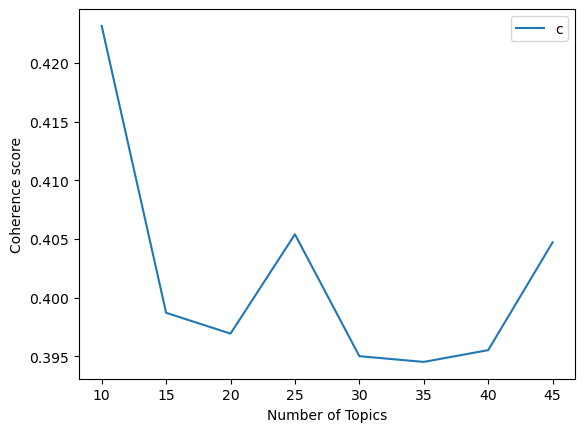

In [27]:
from gensim.models import LsiModel
import matplotlib.pyplot as plt

from gensim.models.coherencemodel import CoherenceModel
start,stop,step=10,50,5
plot_graph(processed_corpus,start,stop,step)

## Application of LSI Model

In [68]:
# LSI MODEL

# Specify the number of topics to generate 
num_topics = 25

# Create an LSI model from the TF-IDF vectors
lsi_model = models.LsiModel(tfidf_corpus, id2word=dictionary, num_topics=num_topics)

# create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi
corpus_lsi = lsi_model[tfidf_corpus] 


In [69]:
cnt=0
print("format")
print("topic followed by its proportion in the document -- >  a vector having dimensions equal to number of topics")
print("text of the speech")
for vec,doc in zip(corpus_lsi,text_corpus):
  print(vec,doc)
  cnt+=1
  if(cnt>2):
    break
     

format
topic followed by its proportion in the document -- >  a vector having dimensions equal to number of topics
text of the speech
[(0, -0.2282355257138175), (1, 0.16877284623554892), (2, -0.09937873830296878), (3, -0.18885417179884964), (4, 0.11773470036073728), (5, 0.0074860316274102156), (6, 0.12410890314083561), (7, -0.06751057897761736), (8, -0.02530955928799429), (9, 0.07393496647063759), (10, -0.08781705853682996), (11, -0.14488618828466227), (12, 0.14337625421355962), (13, 0.06077689063363977), (14, 0.004239134703045957), (15, -0.011141356322275297), (16, -0.07855497927038771), (17, 0.04620221793103756), (18, -0.0393695756745924), (19, 0.04384934571047529), (20, -0.04716098026657681), (21, -0.006575473745998917), (22, -0.008930964325257315), (23, -0.050572470733521786), (24, 0.04916251818435855)] 
State of the Union Address
George Washington
December 8, 1790

Fellow-Citizens of the Senate and House of Representatives:

In meeting you again I feel much satisfaction in being a

In [95]:
# Get the first 25 topics

print("LSI Model:")
 
for idx in range(25):
    # Print the first 25 most representative topics
    print("Topic #%s:" % idx, lsi_model.print_topic(idx, 20))
    print()

LSI Model:
Topic #0: -0.125*"program" + -0.101*"help" + -0.100*"tonight" + -0.089*"americans" + -0.086*"economic" + -0.084*"budget" + -0.072*"job" + -0.069*"today" + -0.064*"billion" + -0.064*"school" + -0.063*"spend" + -0.060*"mexico" + -0.060*"children" + -0.057*"percent" + -0.056*"spain" + -0.054*"million" + -0.052*"minister" + -0.052*"convention" + -0.052*"soviet" + -0.052*"claim"

Topic #1: -0.180*"tonight" + -0.167*"program" + -0.153*"help" + -0.140*"americans" + -0.127*"job" + -0.123*"budget" + -0.099*"spend" + -0.097*"today" + -0.097*"school" + -0.096*"billion" + -0.096*"economic" + -0.093*"percent" + -0.090*"children" + 0.081*"spain" + 0.080*"mexico" + -0.078*"million" + -0.077*"challenge" + -0.076*"nuclear" + -0.075*"soviet" + 0.071*"minister"

Topic #2: -0.219*"tonight" + 0.133*"economic" + -0.132*"iraq" + 0.122*"program" + 0.116*"farm" + -0.113*"job" + 0.112*"interstate" + -0.112*"americans" + -0.108*"terrorists" + 0.105*"industrial" + -0.100*"school" + -0.092*"children" + 

In [96]:
# Sample LSI output for top words in topics
lsi_topics = lsi_model.print_topics(num_topics=25,num_words=25)

# Function to extract topic labels
def get_topic_label(topic_words):
    # Split the topic_words string into individual words
    words = topic_words.split('" + ')
    
    # Extract meaningful words (those with non-zero probabilities)
    meaningful_words = [word.split('*"')[1] for word in words if float(word.split('*"')[0]) > 0]
    
    # Combine meaningful words to create a label or description for the topic
    topic_label = ', '.join(meaningful_words)
    
    return topic_label

# Create a dictionary to store topic labels
topic_labels = {}

# Iterate through the LSI topics and extract labels
for topic_id, topic_words in lsi_topics:
    label = get_topic_label(topic_words)
    topic_labels[topic_id] = label

# Print the topic labels
for topic_id, label in topic_labels.items():
    print(f"Topic {topic_id}: {label}")

Topic 0: 
Topic 1: spain, mexico, minister, convention, british, vessels
Topic 2: economic, program, farm, interstate, industrial, production, agriculture, cent, corporations, price, farmer, agricultural"
Topic 3: silver, gold, circulation, tonight, currency, coinage, coin, arbitration, cent, conference, cuba, iraq, interstate, corporations, award, chinese, certificate
Topic 4: interstate, corporations, railroad, iraq, combinations, corporation, terrorists, militia, industrial, supervision, regulation, combination, gentlemen, railways
Topic 5: job, bank, college, deficit, budget, program, spend, percent
Topic 6: silver, coinage, coin, gold, militia, circulation, iraq, cent, currency, spanish, terrorists, spain, cuba, conference"
Topic 7: iraq, terrorists, tariff, iraqi, agriculture, colonies, board, construction, veterans"
Topic 8: mexico, texas, iraq, terrorists, currency, iraqi, bank, cent, specie, gold, terror, mexican, circulation, silver, agriculture, paper, agricultural"
Topic 9:

## Find document having max proportion of a given topic

In [108]:
# Define the topic of interest 
desired_topic = 8

# Initialize variables to keep track of the maximum proportion and corresponding year
max_proportion = -1  # Initialize to a value lower than any possible proportion
year_with_max_proportion = None

# Iterate through the corpus and find the document with the highest proportion of the desired topic
for idx, doc in enumerate(corpus_lsi):
    for topic in doc:
        topic_id, proportion = topic
        if topic_id == desired_topic and proportion > max_proportion:
            max_proportion = proportion
            year_with_max_proportion = df.iloc[idx]['year_of_the_speech']

# Print the result
print(f"Year with the highest proportion of Topic #{desired_topic}: {year_with_max_proportion} (Proportion: {max_proportion})")

Year with the highest proportion of Topic #8: 1868 (Proportion: 0.33904838433570894)


In [111]:
# Print the speech of the particular year
year = 1897
speech = df[df['year_of_the_speech'] == year]['text_of_the_speech'].values[0]
print(speech)


State of the Union Address
William McKinley
December 6, 1897

To the Senate and House of Representatives:

It gives me pleasure to extend greeting to the Fifty-fifth Congress,
assembled in regular session at the seat of Government, with many of whose
Senators and Representatives I have been associated in the legislative
service. Their meeting occurs under felicitous conditions, justifying
sincere congratulation and calling for our grateful acknowledgment to a
beneficent Providence which has so signally blessed and prospered us as a
nation. Peace and good will with all the nations of the earth continue
unbroken.

A matter of genuine satisfaction is the growing feeling of fraternal regard
and unification of all sections of our country, the incompleteness of which
has too long delayed realization of the highest blessings of the Union. The
spirit of patriotism is universal and is ever increasing in fervor. The
public questions which now most engross us are lifted far above either
partisan

## LSI Word Cloud

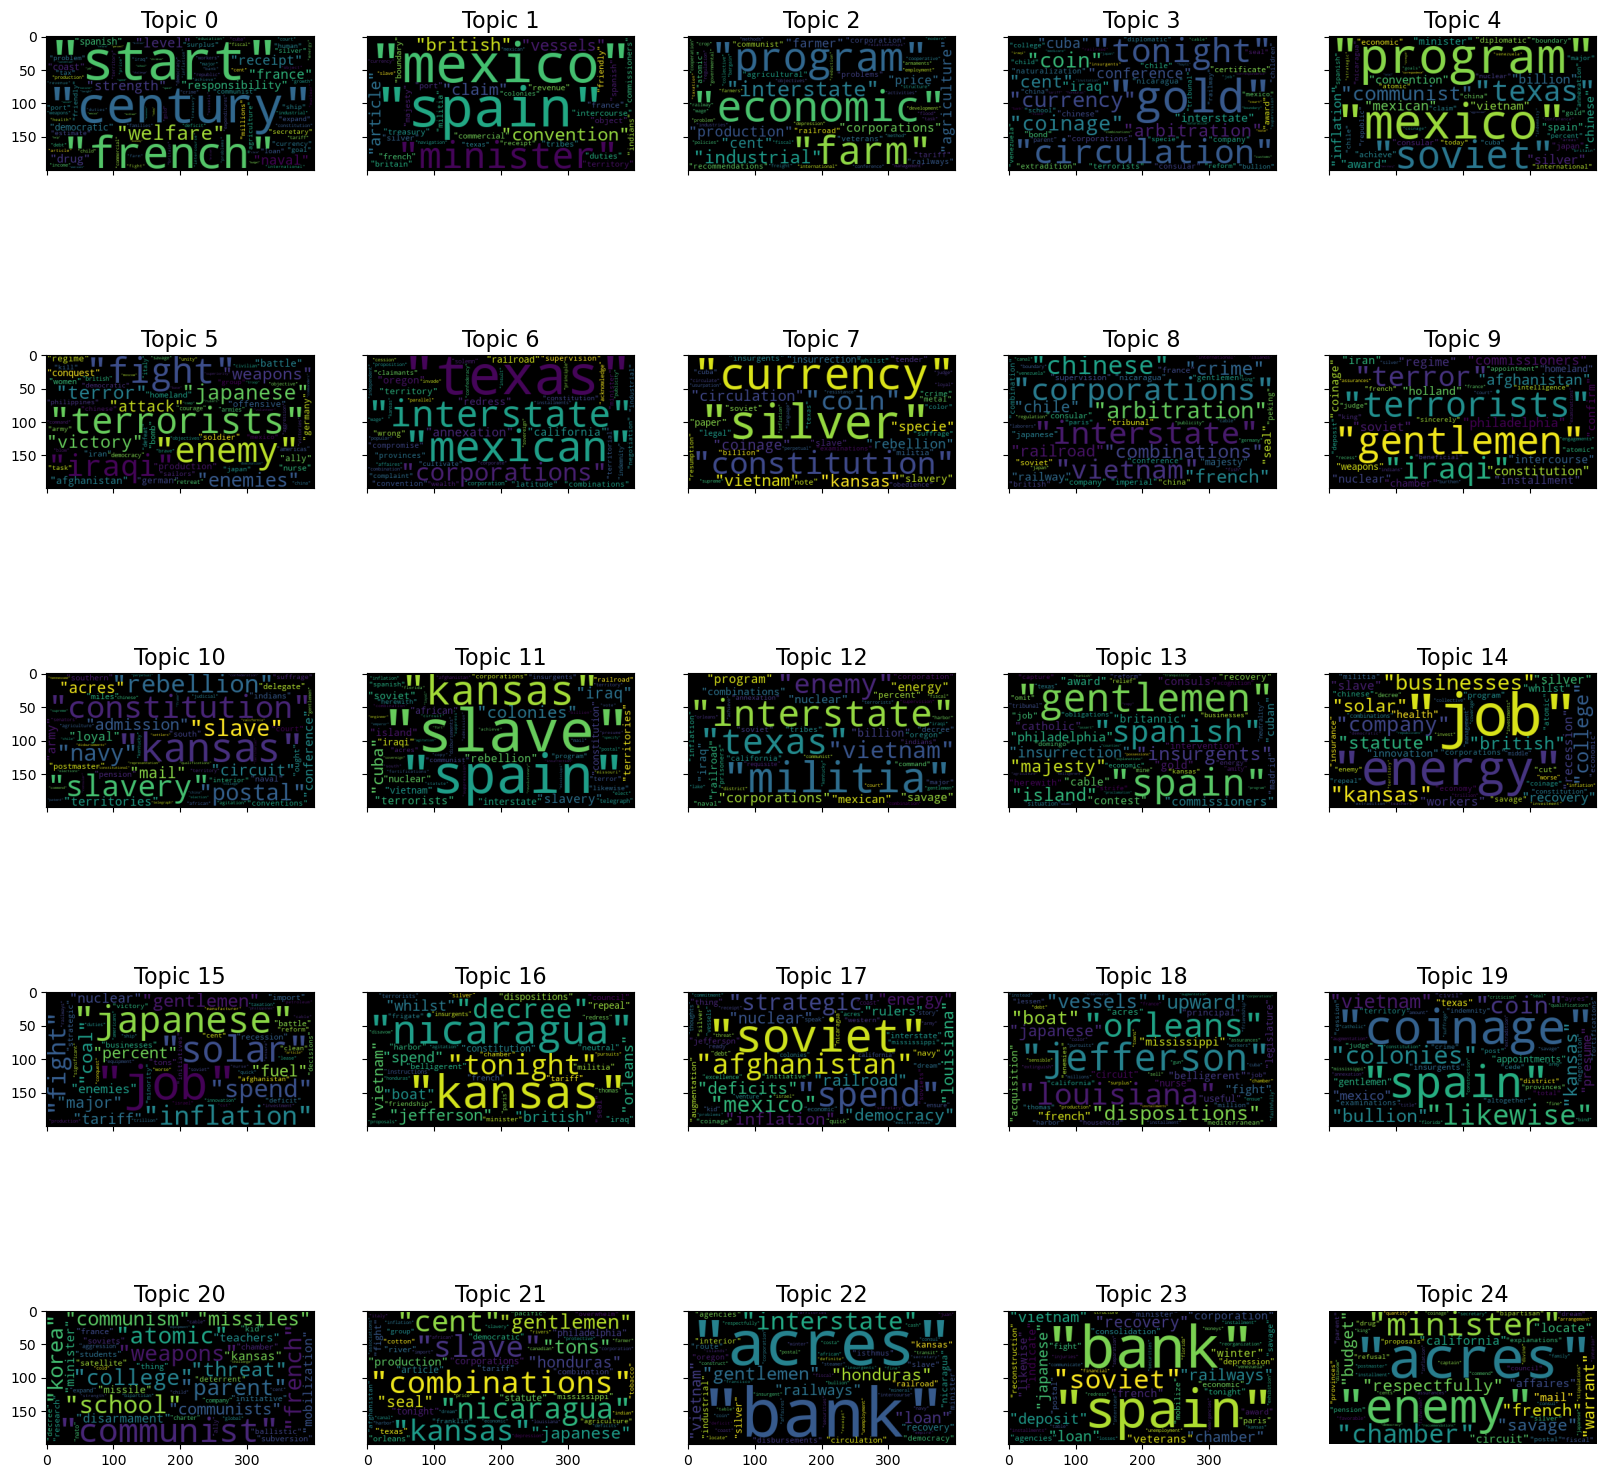

In [62]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

lsi_topics = lsi_model.print_topics(num_topics = 25, num_words = 100 )
f, axes_arr = plt.subplots(5, 5, sharex='col', sharey='row', figsize=(20,20))

for i in range(25):
    dicti = {}
    for temp in lsi_topics[i][1].split(" ")[1:]:
        if temp != '+':
            dicti[temp.split('*')[1]] = (float)(temp.split('*')[0])
    wordcloud = WordCloud( max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
    wordcloud.generate_from_frequencies(dicti)# Visualize the word cloud
    axes_arr[i//5][i%5].imshow(wordcloud)
    axes_arr[i//5][i%5].set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.axis('off')

## LDA Topic Modeling

In [112]:

# LDA Model

# Specify the number of topics to generate (you should experiment with this)
num_topics = 25

# Create an LDA model from the TF-IDF vectors
lda_model = models.LdaModel(corpus=tfidf_corpus, id2word=dictionary, num_topics=num_topics)

corpus_lda = lda_model[tfidf_corpus]


In [118]:
 
# Print the first 25 topics
for idx in range(25):
    # Print the first 10 most representative topics
    print("Topic #%s:" % idx, lda_model.print_topic(idx, 20))
    print()

Topic #0: 0.002*"tonight" + 0.002*"school" + 0.001*"child" + 0.001*"drug" + 0.001*"children" + 0.001*"job" + 0.001*"help" + 0.001*"college" + 0.001*"parent" + 0.001*"reclamation" + 0.001*"americans" + 0.001*"constitution" + 0.001*"budget" + 0.001*"article" + 0.001*"valuation" + 0.001*"students" + 0.001*"program" + 0.001*"affordable" + 0.001*"agriculture" + 0.001*"invest"

Topic #1: 0.002*"soviet" + 0.002*"examinations" + 0.001*"interstate" + 0.001*"partisan" + 0.001*"bargain" + 0.001*"administrative" + 0.001*"veterans" + 0.001*"program" + 0.001*"duties" + 0.001*"management" + 0.001*"official" + 0.001*"copy" + 0.001*"herewith" + 0.001*"commence" + 0.001*"appointment" + 0.001*"energy" + 0.001*"dispute" + 0.001*"afghanistan" + 0.001*"collective" + 0.001*"jurisdictional"

Topic #2: 0.001*"slave" + 0.001*"nicaragua" + 0.001*"arbitration" + 0.001*"international" + 0.001*"program" + 0.001*"japan" + 0.001*"consular" + 0.001*"soviet" + 0.001*"china" + 0.001*"african" + 0.001*"boundary" + 0.001*

In [125]:
# Sample Lda output for top words in topics
lda_topics = lda_model.print_topics(num_topics=25,num_words=25)

# Function to extract topic labels
def get_topic_label(topic_words):
    # Split the topic_words string into individual words
    words = topic_words.split('" + ')
    
    # Extract meaningful words (those with non-zero probabilities)
    meaningful_words = [word.split('*"')[1] for word in words if float(word.split('*"')[0]) > 0]
    
    # Combine meaningful words to create a label or description for the topic
    topic_label = ', '.join(meaningful_words)
    
    return topic_label

# Create a dictionary to store topic labels
topic_labels = {}

# Iterate through the LSI topics and extract labels
for topic_id, topic_words in lda_topics:
    label = get_topic_label(topic_words)
    topic_labels[topic_id] = label

# Print the topic labels
for topic_id, label in topic_labels.items():
    print(f"Topic {topic_id}: {label}")
    print("")
    

Topic 0: tonight, school, child, drug, children, job, help, college, parent, reclamation, americans, constitution, budget, article, valuation, students, program, affordable, agriculture, invest, duties, economic, tariff, dispositions, blockade"

Topic 1: soviet, examinations, interstate, partisan, bargain, administrative, veterans, program, duties, management, official, copy, herewith, commence, appointment, energy, dispute, afghanistan, collective, jurisdictional, island, legal, mexico, atomic, persons"

Topic 2: slave, nicaragua, arbitration, international, program, japan, consular, soviet, china, african, boundary, chinese, convention, british, diplomatic, seal, economic, mexico, afghanistan, republics, lease, minister, budget, britain, lend"

Topic 3: program, vietnam, percent, americans, help, crime, billion, challenge, tonight, children, corporations, start, wage, soviet, deficits, partnership, spend, social, heroism, anarchy, million, job, needy, workers, medicare"

Topic 4: sav

## Find document having max proportion of a given topic

In [141]:
# Define the topic of interest 
desired_topic = 9

# Initialize variables to keep track of the maximum proportion and corresponding year
max_proportion = -1  # Initialize to a value lower than any possible proportion
year_with_max_proportion = None

# Iterate through the corpus and find the document with the highest proportion of the desired topic
for idx, doc in enumerate(corpus_lda):
    for topic in doc:
        topic_id, proportion = topic
        if topic_id == desired_topic and proportion > max_proportion:
            max_proportion = proportion
            year_with_max_proportion = df.iloc[idx]['year_of_the_speech']

# Print the result
print(f"Year with the highest proportion of Topic #{desired_topic}: {year_with_max_proportion} (Proportion: {max_proportion})")

Year with the highest proportion of Topic #9: 1940 (Proportion: 0.27662068605422974)


In [133]:
# Print the speech of the particular year
year = 1916
speech = df[df['year_of_the_speech'] == year]['text_of_the_speech'].values[0]
print(speech)


State of the Union Address
Woodrow Wilson
December 5, 1916

GENTLEMEN OF THE CONGRESS:

In fulfilling at this time the duty laid upon me by the Constitution of
communicating to you from time to time information of the state of the
Union and recommending to your consideration such legislative measures as
may be judged necessary and expedient, I shall continue the practice, which
I hope has been acceptable to you, of leaving to the reports of the several
heads of the executive departments the elaboration of the detailed needs of
the public service and confine myself to those matters of more general
public policy with which it seems necessary and feasible to deal at the
present session of the Congress.

I realize the limitations of time under which you will necessarily act at
this session and shall make my suggestions as few as possible; but there
were some things left undone at the last session which there will now be
time to complete and which it seems necessary in the interest of the 

## Word Cloud for LDA Model

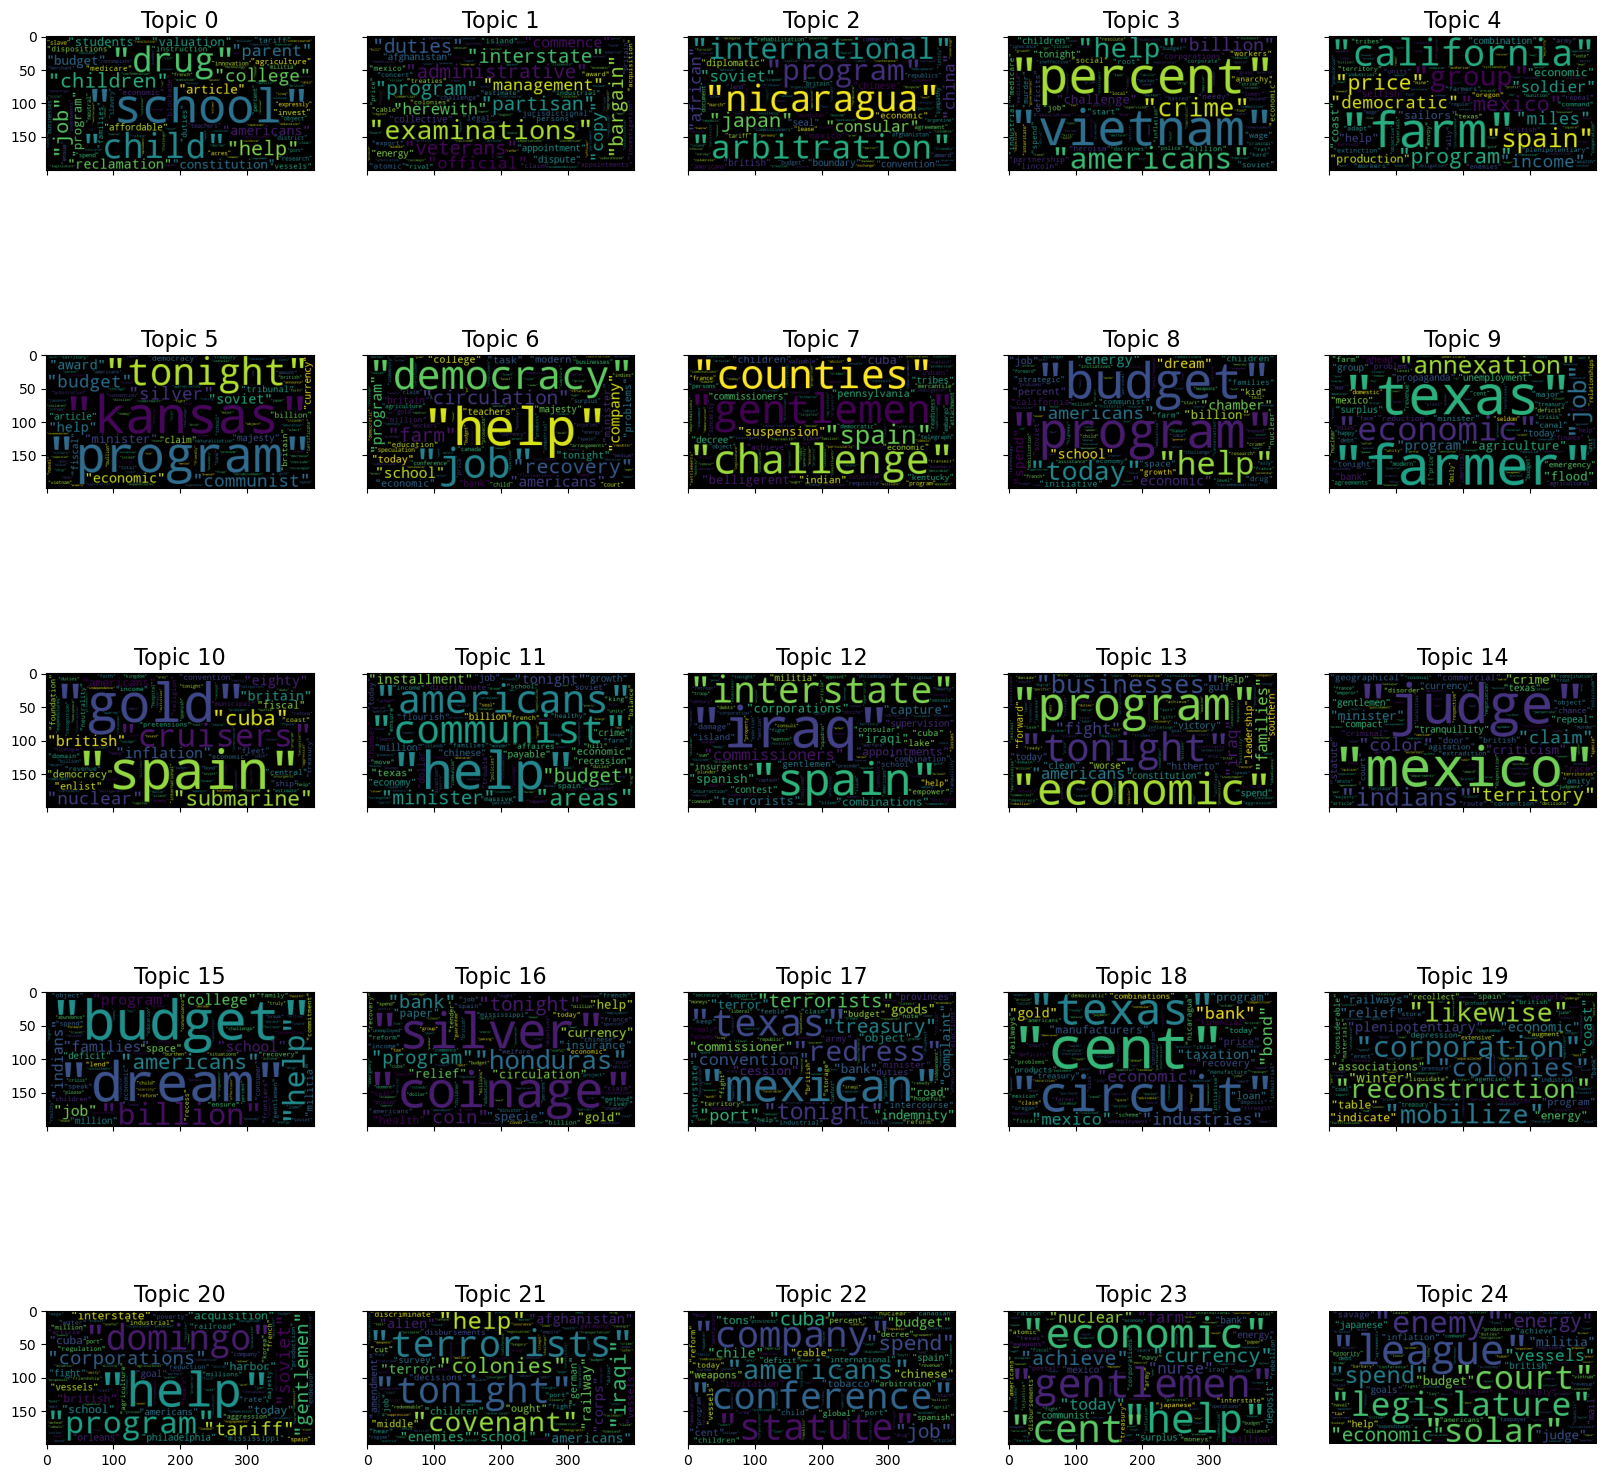

In [119]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

lda_topics = lda_model.print_topics(num_topics = 25, num_words = 100 )
f, axes_arr = plt.subplots(5, 5, sharex='col', sharey='row', figsize=(20,20))

for i in range(25):
    dicti = {}
    for temp in lda_topics[i][1].split(" ")[1:]:
        if temp != '+':
            dicti[temp.split('*')[1]] = (float)(temp.split('*')[0])
    wordcloud = WordCloud( max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
    wordcloud.generate_from_frequencies(dicti)# Visualize the word cloud
    axes_arr[i//5][i%5].imshow(wordcloud)
    axes_arr[i//5][i%5].set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.axis('off')

# Decade Summarization Algorithm

In [143]:
print(df['text_of_the_speech'][217])


State of the Union Address
Barack Obama 
January 24, 2012

Mr. Speaker, Mr. Vice President, members of Congress, distinguished guests,
and fellow Americans:

Last month, I went to Andrews Air Force Base and welcomed home some of our
last troops to serve in Iraq. Together, we offered a final, proud salute to
the colors under which more than a million of our fellow citizens fought - and
several thousand gave their lives.

We gather tonight knowing that this generation of heroes has made the United
States safer and more respected around the world. For the first time in nine
years, there are no Americans fighting in Iraq. For the first time in two
decades, Osama bin Laden is not a threat to this country. Most of al-Qaeda's
top lieutenants have been defeated. The Taliban's momentum has been broken,
and some troops in Afghanistan have begun to come home.

These achievements are a testament to the courage, selflessness, and teamwork
of America's Armed Forces. At a time when too many of our i

In [144]:
#Decade Summarization 
decade_dict = {}

decades = ['1901-1910', '1911-1920', '1921-1930', '1931-1940', '1941-1950', '1951-1960', '1961-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2011-2020']
start = 0  # Start from the first row

for cnt in range(12):
    end = start + 10
    if end >= len(df):  # Check if the end index is within the DataFrame's length
        end = len(df) - 1

    decade_data = " "
    for i in range(start, end + 1):
        decade_data = decade_data + df['text_of_the_speech'][i]

    start = end + 1  # Move to the next decade

    print(decades[cnt])
    decade_dict[decades[cnt]] = decade_data

1901-1910
1911-1920
1921-1930
1931-1940
1941-1950
1951-1960
1961-1970
1971-1980
1981-1990
1991-2000
2001-2010
2011-2020


In [145]:
#Prepare text to apply lda on this already trained on this corpus
print(decade_dict.keys())

dict_keys(['1901-1910', '1911-1920', '1921-1930', '1931-1940', '1941-1950', '1951-1960', '1961-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2011-2020'])


In [146]:
# Create a set of frequent words

stoplist = stopwords
#text_corpus=df['text_of_the_speech']


# Lowercase each document, split it by white space and filter out stopwords
texts = [[re.sub(r"[0-9]+","",word) for word in  preprocess(document) if word not in stoplist]
         for document in decade_dict.values()]

# Count word frequencies
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus_decade = [[token for token in text if (frequency[token] > 1 )] for text in texts]
while('' in processed_corpus_decade) : 
    processed_corpus_decade.remove('') 
print(processed_corpus_decade[0])

from gensim import corpora
from gensim import models

dictionary_decade = corpora.Dictionary(processed_corpus_decade)
print(dictionary_decade)

['state', 'union', 'address', 'george', 'washington', 'december', 'fellow', 'citizens', 'senate', 'house', 'representatives', 'meet', 'feel', 'satisfaction', 'able', 'repeat', 'congratulations', 'favorable', 'prospect', 'continue', 'distinguish', 'public', 'affairs', 'abundant', 'fruit', 'year', 'bless', 'country', 'plenty', 'mean', 'flourish', 'commerce', 'progress', 'public', 'credit', 'witness', 'considerable', 'rise', 'american', 'stock', 'abroad', 'home', 'revenues', 'allot', 'national', 'purpose', 'productive', 'calculations', 'regulate', 'circumstance', 'please', 'proof', 'fertility', 'resources', 'assure', 'increase', 'national', 'respectability', 'credit', 'bear', 'honorable', 'testimony', 'patriotism', 'integrity', 'mercantile', 'marine', 'citizens', 'punctuality', 'discharge', 'engagements', 'exemplary', 'conformity', 'power', 'vest', 'act', 'session', 'loan', 'florins', 'provisional', 'measure', 'previously', 'take', 'place', 'complete', 'holland', 'celerity', 'fill', 'natu

In [147]:

from gensim import corpora
from gensim import models

dictionary_decade = corpora.Dictionary(processed_corpus_decade)
print(dictionary_decade)

dictionary_decade.filter_extremes(no_below= 3, no_above=0.9)
print(dictionary_decade)


bow_corpus_decade = [dictionary_decade.doc2bow(text) for text in processed_corpus_decade]
print(bow_corpus_decade[0])
 
tfidf_decade = models.TfidfModel(bow_corpus_decade)

tfidf_corpus_decade=tfidf_decade[bow_corpus_decade]

Dictionary<7514 unique tokens: ['abandon', 'abatement', 'abet', 'abilities', 'ability']...>
Dictionary<4102 unique tokens: ['abatement', 'abound', 'abridge', 'absolute', 'abundance']...>
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 3), (7, 3), (8, 1), (9, 5), (10, 2), (11, 1), (12, 3), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 2), (20, 4), (21, 1), (22, 1), (23, 1), (24, 1), (25, 3), (26, 2), (27, 1), (28, 4), (29, 3), (30, 1), (31, 2), (32, 1), (33, 4), (34, 1), (35, 2), (36, 2), (37, 3), (38, 2), (39, 4), (40, 1), (41, 2), (42, 3), (43, 2), (44, 1), (45, 2), (46, 1), (47, 1), (48, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 4), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 2), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 2), (71, 1), (72, 2), (73, 4), (74, 1), (75, 3), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 7), (84, 1), (85, 3), (86, 1), (87, 2), (88, 1), (89, 1), (90, 1), (91

In [148]:
lda_model_decade = models.LdaModel(tfidf_corpus_decade, id2word=dictionary_decade, num_topics=15,minimum_probability=0.0)
corpus_lda_decade=lda_model_decade[tfidf_corpus_decade]
print(corpus_lda_decade[2])

[(0, 0.9361236), (1, 0.0045625996), (2, 0.004562615), (3, 0.0045625973), (4, 0.0045625963), (5, 0.0045625963), (6, 0.0045625963), (7, 0.0045625987), (8, 0.0045625963), (9, 0.0045625963), (10, 0.0045625963), (11, 0.0045626163), (12, 0.0045625963), (13, 0.0045625963), (14, 0.0045625973)]


In [149]:
lda_model_decade.print_topics(num_topics=15,num_words=25)

[(0,
  '0.002*"interstate" + 0.001*"mexico" + 0.001*"california" + 0.001*"mexican" + 0.001*"adventurers" + 0.001*"corporations" + 0.001*"texas" + 0.001*"international" + 0.001*"nicaragua" + 0.001*"savage" + 0.001*"provinces" + 0.001*"conference" + 0.001*"silver" + 0.001*"kansas" + 0.001*"catholic" + 0.001*"colonies" + 0.001*"japan" + 0.001*"railroad" + 0.001*"chinese" + 0.001*"pensacola" + 0.001*"wage" + 0.001*"industrial" + 0.001*"china" + 0.001*"statute" + 0.001*"methods"'),
 (1,
  '0.001*"gentlemen" + 0.001*"croix" + 0.001*"whatsoever" + 0.001*"philadelphia" + 0.001*"counties" + 0.001*"recess" + 0.000*"militia" + 0.000*"burthen" + 0.000*"catholic" + 0.000*"kentucky" + 0.000*"holland" + 0.000*"tranquillity" + 0.000*"commissioners" + 0.000*"george" + 0.000*"passamaquoddy" + 0.000*"adams" + 0.000*"indians" + 0.000*"situations" + 0.000*"accelerate" + 0.000*"cherokees" + 0.000*"mild" + 0.000*"effusion" + 0.000*"misconception" + 0.000*"provisionally" + 0.000*"overtures"'),
 (2,
  '0.001*"

## Topic Annotations
Topic 0: "International Relations"
Topic 1: "Economic Matters"
Topic 2: "Military Engagements"
Topic 3: "Territorial Disputes"
Topic 4: "Government and Coinage"
Topic 5: "International Diplomacy"
Topic 6: "Colonial Affairs"
Topic 7: "Slavery and Territories"
Topic 8: "Barbary Wars"
Topic 9: "Currency and Economic Issues"
Topic 10: "Colonial Policies"
Topic 11: "Industrial and Economic Development"
Topic 12: "Economic Challenges"
Topic 13: "Corporations and Labor"
Topic 14: "Labor and Corporate Policies"

In [89]:
for i in range(12):
  print(decades[i],corpus_lda_decade[i]) 
  print()
  print()

1901-1910 [(0, 0.007229684), (1, 0.007229683), (2, 0.0072297016), (3, 0.007229684), (4, 0.89878446), (5, 0.007229684), (6, 0.0072296876), (7, 0.007229683), (8, 0.0072296895), (9, 0.007229683), (10, 0.007229683), (11, 0.0072296937), (12, 0.007229683), (13, 0.0072296862), (14, 0.007229685)]


1911-1920 [(0, 0.008877847), (1, 0.008877846), (2, 0.008877874), (3, 0.008877848), (4, 0.008877864), (5, 0.008877847), (6, 0.008877855), (7, 0.008877847), (8, 0.87571007), (9, 0.008877846), (10, 0.008877846), (11, 0.00887787), (12, 0.008877846), (13, 0.008877855), (14, 0.008877852)]


1921-1930 [(0, 0.0086809825), (1, 0.008680982), (2, 0.8784658), (3, 0.008681023), (4, 0.008681031), (5, 0.0086809825), (6, 0.008681008), (7, 0.0086809825), (8, 0.008681017), (9, 0.0086809825), (10, 0.0086809825), (11, 0.008681264), (12, 0.008680982), (13, 0.008681013), (14, 0.008680989)]


1931-1940 [(0, 0.008081599), (1, 0.008081598), (2, 0.008081631), (3, 0.008081602), (4, 0.008081648), (5, 0.0080816), (6, 0.76513666

C:\Users\sonam\AppData\Local\Temp\ipykernel_6756\769752502.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap("tab20", num_topics)


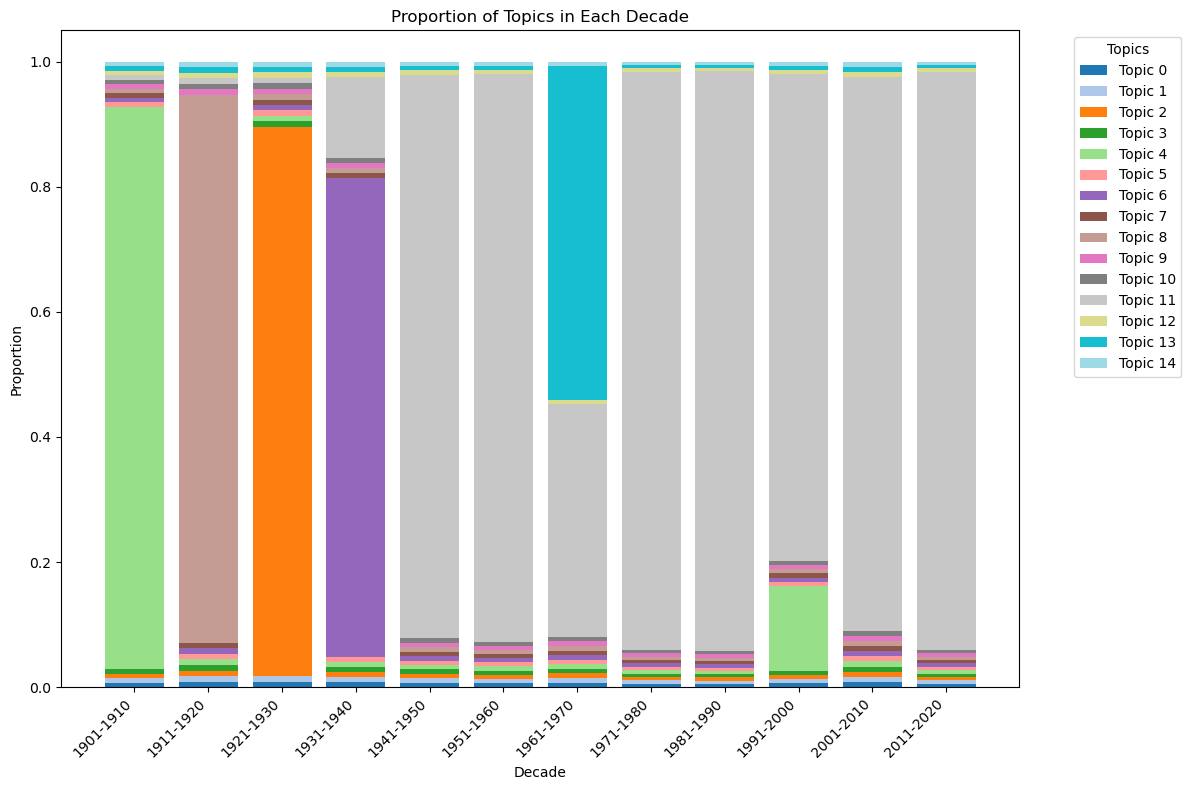

In [152]:
import matplotlib.pyplot as plt
import numpy as np

# Define the decades and topic proportions 
decades = [
    "1901-1910", "1911-1920", "1921-1930", "1931-1940", "1941-1950",
    "1951-1960", "1961-1970", "1971-1980", "1981-1990", "1991-2000",
    "2001-2010", "2011-2020"
]

topic_proportions = [
    [0.007229684, 0.007229683, 0.0072297016, 0.007229684, 0.89878446, 0.007229684, 0.0072296876, 0.007229683, 0.0072296895, 0.007229683, 0.007229683, 0.0072296937, 0.007229683, 0.0072296862, 0.007229685],
    [0.008877847, 0.008877846, 0.008877874, 0.008877848, 0.008877864, 0.008877847, 0.008877855, 0.008877847, 0.87571007, 0.008877846, 0.008877846, 0.00887787, 0.008877846, 0.008877855, 0.008877852],
    [0.0086809825, 0.008680982, 0.8784658, 0.008681023, 0.008681031, 0.0086809825, 0.008681008, 0.0086809825, 0.008681017, 0.0086809825, 0.0086809825, 0.008681264, 0.008680982, 0.008681013, 0.008680989],
    [0.008081599, 0.008081598, 0.008081631, 0.008081602, 0.008081648, 0.0080816, 0.76513666, 0.008081599, 0.0080816215, 0.008081599, 0.008081599, 0.12980248, 0.008081598, 0.008081615, 0.008081604],
    [0.0070861904, 0.00708619, 0.0070862025, 0.007086198, 0.0070862286, 0.0070861904, 0.0070862295, 0.0070861904, 0.007086204, 0.0070861904, 0.0070861904, 0.90079325, 0.00708619, 0.0070862016, 0.007086196],
    [0.0066170143, 0.006617014, 0.006617038, 0.006617015, 0.0066170366, 0.0066170143, 0.0066170213, 0.0066170143, 0.006617111, 0.006617014, 0.006617014, 0.9073616, 0.006617014, 0.006617032, 0.006617019],
    [0.0073264027, 0.0073264022, 0.0073264153, 0.0073264036, 0.0073264632, 0.0073264036, 0.0073264088, 0.0073264027, 0.0073264157, 0.0073264027, 0.0073264027, 0.3719266, 0.0073264022, 0.53283006, 0.0073264036],
    [0.0054461546, 0.005446154, 0.0054461597, 0.0054461546, 0.0054461793, 0.0054461556, 0.0054461607, 0.0054461546, 0.005446158, 0.0054461546, 0.005446154, 0.92375374, 0.005446154, 0.005446187, 0.0054461556],
    [0.005237913, 0.0052379114, 0.0052379156, 0.005237912, 0.0052379374, 0.0052379146, 0.005237914, 0.0052379114, 0.0052379156, 0.0052379114, 0.0052379114, 0.9266692, 0.0052379114, 0.005237918, 0.005237913],
    [0.0065567265, 0.006556725, 0.006556731, 0.006556726, 0.13585724, 0.006556731, 0.006556731, 0.006556726, 0.00655673, 0.006556726, 0.006556725, 0.7789053, 0.006556725, 0.006556744, 0.0065567275],
    [0.008212665, 0.008212664, 0.008212666, 0.008212665, 0.0082126865, 0.008212667, 0.008212668, 0.008212665, 0.00821267, 0.008212664, 0.008212664, 0.8850225, 0.008212664, 0.008212751, 0.008212715],
    [0.0054179714, 0.0054179714, 0.005417972, 0.0054179714, 0.0054180245, 0.005417972, 0.005417972, 0.0054179714, 0.005417972, 0.0054179714, 0.0054179714, 0.9241483, 0.0054179714, 0.005417978, 0.005417974]
]

# Define the number of topics
num_topics = len(topic_proportions[0])

# Transpose the data for plotting
topic_proportions = np.array(topic_proportions).T.tolist()

# Create a color map for topics
color_map = plt.cm.get_cmap("tab20", num_topics)

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
bottom = np.zeros(len(decades))
for i, topic_proportion in enumerate(topic_proportions):
    ax.bar(decades, topic_proportion, label=f"Topic {i}", color=color_map(i), bottom=bottom)
    bottom += np.array(topic_proportion)

# Add labels and legend
ax.set_xlabel("Decade")
ax.set_ylabel("Proportion")
ax.set_title("Proportion of Topics in Each Decade")
ax.legend(title="Topics", bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()

In [154]:
jupyter nbconvert --to pdf notebook.ipynb

SyntaxError: invalid syntax (1827601380.py, line 1)

In [155]:
!pip install amsmath

ERROR: Could not find a version that satisfies the requirement amsmath (from versions: none)
ERROR: No matching distribution found for amsmath
